In [232]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 환경에서는 'Malgun Gothic' 폰트를 사용
else:
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS나 Linux 등 다른 환경에서는 'AppleGothic' 폰트를 사용

matplotlib.rcParams['axes.unicode_minus'] = False

In [233]:
import os
os.chdir(r"C:\Users\zlddp\OneDrive\바탕 화면\A3_대형마트") #current directory 지정
os.getcwd()

'C:\\Users\\zlddp\\OneDrive\\바탕 화면\\A3_대형마트'

In [234]:
#데이터 불러오기
member = pd.read_csv("member_data.csv")
member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal
...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal


In [235]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   회원번호         11555 non-null  int64  
 1   조합원상태        11555 non-null  object 
 2   주소           11555 non-null  object 
 3   성별           11553 non-null  object 
 4   연령           11553 non-null  float64
 5   배송서비스신청여부    11555 non-null  object 
 6   모바일알람여부      11555 non-null  object 
 7   Gold_member  11555 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 722.3+ KB


In [236]:
member.isnull().sum() #데이터 결측값 확인 - 성별 / 연령에서 확인

회원번호           0
조합원상태          0
주소             0
성별             2
연령             2
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

In [237]:
member = member.dropna(subset=['성별', '연령']) #성별, 연령 결측치 제거 (전체 데이터 중 2개라 미미할 것이라 예상)

In [238]:
member.isnull().sum() #결측값 재확인

회원번호           0
조합원상태          0
주소             0
성별             0
연령             0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

In [239]:
len(member.회원번호.unique())

11552

In [240]:
data1 = pd.read_csv("product_data_001.csv") #마트 B
data2 = pd.read_csv("product_data_002.csv") #마트 D
data3 = pd.read_csv("product_data_003.csv") #마트 C
data4 = pd.read_csv("product_data_004.csv") #마트 A

In [241]:
data = pd.concat([data1, data2, data3, data4], ignore_index=True)
data

,공급일자_,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2021-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2021-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2021-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2021-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2021-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29
...,...,...,...,...,...,...,...,...,...,...,...,...
294640,2021-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26
294641,2021-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58
294642,2021-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36
294643,2021-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294645 entries, 0 to 294644
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자_     294645 non-null  object 
 1   회원번호      294645 non-null  int64  
 2   조합원상태     294645 non-null  object 
 3   물품대분류     294645 non-null  object 
 4   물품중분류     294645 non-null  object 
 5   물품소분류     294645 non-null  object 
 6   물품명       294645 non-null  object 
 7   구매수량      294645 non-null  float64
 8   구매금액      294645 non-null  int64  
 9   구매매장      294645 non-null  object 
 10  반품_원거래일자  4960 non-null    float64
 11  구매시각      294645 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 27.0+ MB


In [243]:
data.isnull().sum() #결측값 확인

공급일자_            0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
구매금액             0
구매매장             0
반품_원거래일자    289685
구매시각             0
dtype: int64

#### 마트 A~D 결측치 처리 (합친 데이터 명 : data)

* 공급일자가 2021년 1월 1일부터 시작하는 데이터인데 </br>
반품 원거래 일자가 2020년으로 쓰여있는 값들은 이상치라고 생각하여 제거
-> 9개의 데이터 삭제

In [244]:
# 반품 원거래 일자가 2020년으로 쓰여있는 값들은 이상치
product = data[~data['반품_원거래일자'].astype(str).str.contains('2020')]

## 반품 일자 결측치 처리
# 반품 원거래일자 Nan값인데 금액은 -인 데이터
mask = (product['구매금액'] < 0) & (product['반품_원거래일자'].isnull())
product.loc[mask, '반품_원거래일자'] = pd.to_datetime(product.loc[mask, '공급일자_'])

# '반품_원거래일자'가 결측값이고 '구매수량'이 양수인 데이터만 선택 (구매수량이 음수면 반품)
product = product[(product['반품_원거래일자'].isna()) & (product['구매수량'] > 0)]
product.reset_index(drop = True, inplace = True)

In [245]:
merged_data = pd.merge(member, product, on=['회원번호', '조합원상태']) #회원번호, 조합원상태 기준으로 두 데이터를 합침
merged_data

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자_,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2021-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289174,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
289175,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
289176,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
289177,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


In [246]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289179 entries, 0 to 289178
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   회원번호         289179 non-null  int64  
 1   조합원상태        289179 non-null  object 
 2   주소           289179 non-null  object 
 3   성별           289179 non-null  object 
 4   연령           289179 non-null  float64
 5   배송서비스신청여부    289179 non-null  object 
 6   모바일알람여부      289179 non-null  object 
 7   Gold_member  289179 non-null  object 
 8   공급일자_        289179 non-null  object 
 9   물품대분류        289179 non-null  object 
 10  물품중분류        289179 non-null  object 
 11  물품소분류        289179 non-null  object 
 12  물품명          289179 non-null  object 
 13  구매수량         289179 non-null  float64
 14  구매금액         289179 non-null  int64  
 15  구매매장         289179 non-null  object 
 16  반품_원거래일자     0 non-null       object 
 17  구매시각         289179 non-null  object 
dtypes: float64(2), int64(2),

In [247]:
merged_data.isnull().sum() #데이터 결측값 확인 - 반품_원거래일자에서 확인됨

회원번호                0
조합원상태               0
주소                  0
성별                  0
연령                  0
배송서비스신청여부           0
모바일알람여부             0
Gold_member         0
공급일자_               0
물품대분류               0
물품중분류               0
물품소분류               0
물품명                 0
구매수량                0
구매금액                0
구매매장                0
반품_원거래일자       289179
구매시각                0
dtype: int64

In [248]:
merged_data[merged_data['구매수량'] == 0.05] #대용량 묶음상품 중 일부라 생각하여 그대로 두기로 결론

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자_,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
28148,1165467776,정상회원,수지구-풍덕천동,여,46.0,미신청,수신,normal,2021-08-12,건강,건강일반,건강/기타,홍삼/도라지절편모음(각 20g*5개),0.05,4260,매장D,NaN,16:10
90224,1579118208,정상회원,수지구-풍덕천동,여,30.0,미신청,.,normal,2021-07-05,음료,음료,과즙,포도즙(팩:120ml*20봉),0.05,3044,매장C,NaN,18:38
137941,381044224,정상회원,기타-기타,여,49.0,미신청,.,normal,2021-05-02,건강,홍삼/녹용,녹용,꽃사슴녹용액(수험생/60봉*90ml),0.05,12444,매장A,NaN,19:47
161607,472955200,정상회원,수지구-풍덕천동,여,48.0,미신청,.,normal,2021-09-28,간식,과자,한과/유과,한과모음3(1.2kg),0.05,4131,매장D,NaN,16:59
184776,591137856,정상회원,수지구-동천동,여,40.0,미신청,수신,normal,2021-06-15,건강,홍삼/녹용,녹용,꽃사슴녹용액(수험생/60봉*90ml),0.05,12444,매장A,NaN,15:30


#### 위 데이터 통계량에서 구매금액 0원인 이상치들이 확인

In [249]:
merged_data[merged_data['구매금액'] == 0]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자_,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
447,1002106368,정상회원,분당구-판교동,여,40.0,미신청,.,normal,2021-10-17,반찬,두부/유부,두부,두부(반모:270g)/증정,1.0,0,매장B,NaN,11:21
553,100224000,정상회원,수지구-상현동,여,63.0,미신청,.,normal,2021-10-19,반찬,두부/유부,두부,두부(반모:270g)/증정,1.0,0,매장B,NaN,13:43
1160,1006319488,정상회원,수지구-풍덕천동,여,46.0,신청,.,normal,2021-10-17,반찬,두부/유부,두부,두부(반모:270g)/증정,1.0,0,매장C,NaN,11:29
2030,1009406016,정상회원,기흥구-청덕동,남,51.0,미신청,.,normal,2021-07-25,기타,비물품,장려품,조합원의식조사설문,1.0,0,매장A,NaN,17:48
2076,1009565632,정상회원,서울 강남구-기타,여,67.0,미신청,.,normal,2021-09-21,축산물,중량(정육),돼지(중량),삼겹살구이-성남용인,1.0,0,매장C,NaN,18:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279879,93731712,정상회원,수지구-풍덕천동,남,70.0,미신청,.,VIP,2021-10-21,생활용품,화장품,유아/썬크림,자연그대로 아토크림(증정/15g),1.0,0,매장B,NaN,11:47
282967,967046528,정상회원,수지구-동천동,여,39.0,미신청,.,normal,2021-10-22,생활용품,화장품,유아/썬크림,자연그대로 아토크림(증정/15g),1.0,0,매장A,NaN,11:24
283085,969013888,정상회원,수지구-상현동,남,39.0,신청,.,normal,2021-03-22,기타,비물품,기타,중성세제 샘플(증정/100㎖),1.0,0,매장B,NaN,10:23
286421,982122816,정상회원,수지구-풍덕천동,여,36.0,미신청,수신,normal,2021-03-18,기타,비물품,기타,중성세제 샘플(증정/100㎖),1.0,0,매장A,NaN,12:54


In [250]:
merged_data[merged_data['구매금액'] == 0]['물품명'].unique()

array(['두부(반모:270g)/증정', '조합원의식조사설문', '삼겹살구이-성남용인',
       '쌀 만난 반가米 증정품(사각휴지3상자)', '중성세제 샘플(증정/100㎖)', '자연그대로 아토크림(증정/15g)',
       '에코백(증정)성남용인', '새내기조합원물품할인권(분홍)', '새내기조합원물품할인권(파랑)',
       '자원순환 텀블러 홀더(증정)', '통삼겹-성남용인'], dtype=object)

#### 증정품 데이터라 판단하여 제거

In [251]:
# 증정품 증정인 데이터라 판정하여 삭제 
pattern = r'증정|샘플|조합원|성남용인'
grouped_data = merged_data[~merged_data['물품명'].str.contains(pattern, regex=True)]
grouped_data

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자_,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,2021-06-13,반찬,두부/유부,두부,두부(1모:420g),2.0,7658,매장B,NaN,16:11
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,식사대용,식사대용/기타,닭고기볶음밥(300g),1.0,5743,매장C,NaN,13:27
2,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,식사대용,식사대용/기타,채소볶음밥(300g),1.0,4786,매장C,NaN,13:27
3,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,과자,스낵,하늘바다새우(60g),2.0,7083,매장C,NaN,13:27
4,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,2021-10-12,간식,과자,스낵,우리밀곡물와플(80g),1.0,3829,매장C,NaN,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289174,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-08,축산물,꿀,꿀,아카시아꿀(460g),1.0,27759,매장B,NaN,13:29
289175,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-16,서류,고구마,고구마,밤고구마(1kg),1.0,6700,매장B,NaN,17:45
289176,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-24,간식,빵,앙금크림빵,커스터드큐브빵(135g)/매장,1.0,5360,매장B,NaN,10:06
289177,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-10-24,채소,양념채소,중파,중파(500g),1.0,4212,매장B,NaN,10:06


In [252]:
len(grouped_data.회원번호.unique()) #회원번호 11517개 확인

11517

#### 회원번호별 공급일자 리스트

In [253]:
grouped_data_day = grouped_data.groupby('회원번호')['공급일자_'].unique().reset_index()
grouped_data_day #회원별 방문 날짜

,회원번호,공급일자_
0,18613824,[2021-07-03]
1,18764160,"[2021-04-27, 2021-05-02, 2021-06-23, 2021-07-1..."
2,18942336,"[2021-01-08, 2021-06-03, 2021-01-17, 2021-01-2..."
3,18949760,[2021-09-29]
4,19391488,[2021-05-18]
...,...,...
11512,1644772352,[2021-10-29]
11513,1644957952,[2021-10-29]
11514,1670400000,"[2021-01-03, 2021-01-04, 2021-01-07, 2021-01-0..."
11515,1670606016,"[2021-04-01, 2021-08-26, 2021-09-06, 2021-09-0..."


#### 회원번호별 R점수값 계산(ex. 30일 이내가 가장 높은 점수 5)

In [254]:
grouped_data_day = grouped_data_day.explode('공급일자_') #explode 함수 사용
grouped_data_day['공급일자_'] = pd.to_datetime(grouped_data_day['공급일자_'])
max_date = pd.to_datetime('2021-10-31')

grouped_data_day = grouped_data_day.groupby('회원번호').apply(lambda x: x[x['공급일자_'] == x['공급일자_'].max()]).reset_index(drop=True)

# 최근 날짜를 기준으로 Recency 계산
grouped_data_day['Recency'] = (max_date - grouped_data_day['공급일자_']).dt.days

# Recency에 따라 R 점수 부여하는 함수
def assign_r_score(recency):
    if recency <= 30:
        return 5
    elif recency <= 60:
        return 4
    elif recency <= 90:
        return 3
    elif recency <= 180:
        return 2
    else:
        return 1

grouped_data_day['R_score'] = grouped_data_day['Recency'].apply(assign_r_score)
grouped_data_day[['회원번호', '공급일자_', 'R_score']]

,회원번호,공급일자_,R_score
0,18613824,2021-07-03,2
1,18764160,2021-08-22,3
2,18942336,2021-10-19,5
3,18949760,2021-09-29,4
4,19391488,2021-05-18,2
...,...,...,...
11512,1644772352,2021-10-29,5
11513,1644957952,2021-10-29,5
11514,1670400000,2021-10-30,5
11515,1670606016,2021-10-11,5


#### 월별로 방문횟수 count / F_Score 구하기

In [255]:
grouped_data['공급일자_'] = pd.to_datetime(grouped_data['공급일자_'])

# '공급일자_' 열에서 연도-월 정보 추출
grouped_data['YearMonth'] = grouped_data['공급일자_'].dt.to_period('M')

# '회원번호', 'YearMonth', '공급일자_'로 데이터를 그룹화하고 방문 횟수(count) 계산
grouped_data_f = grouped_data.groupby(['회원번호', 'YearMonth', '공급일자_']).size().reset_index(name='방문횟수')

# '회원번호'와 'YearMonth'로 데이터를 그룹화하고 방문 횟수(count) 합계 계산
grouped_data_f = grouped_data_f.groupby(['회원번호', 'YearMonth'])['방문횟수'].apply(lambda x: (x > 0).sum()).reset_index(name='방문횟수')

# 데이터를 피벗하여 월별 열로 변환
pivot_data = grouped_data_f.pivot(index='회원번호', columns='YearMonth', values='방문횟수')
pivot_data.fillna(0, inplace=True)
pivot_data = pivot_data.astype(int)

# 열 이름을 다시 문자열로 변환
pivot_data.columns = pivot_data.columns.astype(str)

pivot_data

YearMonth,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
회원번호,,,,,,,,,,
18613824,0,0,0,0,0,0,1,0,0,0
18764160,1,0,1,1,1,1,1,1,0,0
18942336,3,2,0,1,0,1,1,2,1,1
18949760,0,0,0,0,0,0,0,0,1,0
19391488,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1644772352,0,0,0,0,0,0,0,0,0,1
1644957952,0,0,0,0,0,0,0,0,0,1
1670400000,29,24,30,30,28,27,30,27,26,28


In [256]:
grouped_data[grouped_data['회원번호'] == 18764160]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자_,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,YearMonth
98839,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-04-27,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059,매장D,NaN,18:58,2021-04
98840,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-05-02,간식,과자,스낵,오징어땅콩볼(100g),1.0,4595,매장D,NaN,12:40,2021-05
98841,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-06-23,간식,식사대용,식사대용/기타,소불고기볶음밥(300g),1.0,9381,매장D,NaN,15:14,2021-06
98842,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-07-12,채소,과일채소,메론,메론_머스크/중(1.5~2kg:1통),1.0,14550,매장D,NaN,19:03,2021-07
98843,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-08-22,음료,음료,빙과,딸기꽁꽁(120ml)/매장용,2.0,4020,매장D,NaN,18:59,2021-08
98844,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-08-22,간식,빵,앙금크림빵,크림빵(75g)/매장,1.0,3063,매장D,NaN,18:59,2021-08
98845,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-01-22,생활용품,생활용품,치약/칫솔,물사랑치약(150g*2개),1.0,8806,매장A,NaN,15:41,2021-01
98846,18764160,정상회원,기타-기타,여,76.0,미신청,.,normal,2021-03-29,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059,매장A,NaN,16:55,2021-03


#### 분기별로 방문횟수 count

In [257]:
# 'YearMonth'를 분기로 변환
pivot_data.columns = pd.PeriodIndex(pivot_data, freq='Q')

# 분기별로 방문 횟수(count)를 묶음
quarterly_data = pivot_data.groupby(axis=1, level=0).sum()
quarterly_data

,2021Q1,2021Q2,2021Q3,2021Q4
회원번호,,,,
18613824,0,0,1,0
18764160,2,3,2,0
18942336,5,2,4,1
18949760,0,0,1,0
19391488,0,1,0,0
...,...,...,...,...
1644772352,0,0,0,1
1644957952,0,0,0,1
1670400000,83,85,83,28


#### 분기별 F점수

In [258]:
# F 점수 계산 함수
def calculate_f_score(frequency):
    if frequency == 0 or frequency == 1:
        return 1
    elif frequency >= 2 and frequency <= 3:
        return 2
    elif frequency >= 4 and frequency <= 6:
        return 3
    elif frequency >= 7 and frequency <= 10:
        return 4
    else:
        return 5

# 분기별 F 점수 계산
f_scores = quarterly_data.applymap(calculate_f_score)
f_scores

,2021Q1,2021Q2,2021Q3,2021Q4
회원번호,,,,
18613824,1,1,1,1
18764160,2,2,2,1
18942336,3,2,3,1
18949760,1,1,1,1
19391488,1,1,1,1
...,...,...,...,...
1644772352,1,1,1,1
1644957952,1,1,1,1
1670400000,5,5,5,5


In [259]:
m_scores = grouped_data.groupby(['회원번호', 'YearMonth'])['구매금액'].sum().reset_index()
m_scores_pivot = m_scores.pivot(index='회원번호', columns='YearMonth', values='구매금액')
m_scores_pivot.fillna(0, inplace=True)

m_scores_pivot.columns = m_scores_pivot.columns.astype(str)
m_scores_pivot = m_scores_pivot.astype(int)

m_scores_pivot[m_scores_pivot < 0] = 0

m_scores_pivot

YearMonth,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
회원번호,,,,,,,,,,
18613824,0,0,0,0,0,0,21059,0,0,0
18764160,8806,0,21059,21059,4595,9381,14550,7083,0,0
18942336,70450,151620,0,40968,0,9955,65473,137071,75237,10146
18949760,0,0,0,0,0,0,0,0,2776,0
19391488,0,0,0,0,3159,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1644772352,0,0,0,0,0,0,0,0,0,85000
1644957952,0,0,0,0,0,0,0,0,0,25079
1670400000,1329854,1407379,1335457,2375076,1128355,1067101,1130079,1363693,1331719,1027037


In [260]:
m_scores['YearMonth'] = m_scores['YearMonth'].astype(str) #'YearMonth' 컬럼을 문자열로 변환하여 월별 열 이름을 올바르게 표시
m_scores_pivot.describe()

YearMonth,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
count,1.151700e+04,1.151700e+04,1.151700e+04,1.151700e+04,1.151700e+04,1.151700e+04,1.151700e+04,1.151700e+04,1.151700e+04,1.151700e+04
mean,2.892651e+04,2.913406e+04,2.692201e+04,2.605010e+04,2.705150e+04,2.618866e+04,3.102429e+04,2.867946e+04,2.884185e+04,2.506470e+04
std,6.293684e+04,7.039551e+04,5.844992e+04,5.913674e+04,5.998164e+04,5.815499e+04,8.136337e+04,6.578315e+04,6.854582e+04,5.701109e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.177900e+04,3.005600e+04,2.929100e+04,2.909900e+04,2.929100e+04,2.775900e+04,3.120500e+04,3.024800e+04,2.948200e+04,2.689800e+04
max,1.329854e+06,1.688514e+06,1.335457e+06,2.375076e+06,1.128355e+06,1.123490e+06,3.506632e+06,1.363693e+06,1.331719e+06,1.145011e+06


위에서 분기별 매출금액을 살펴봤을 때 (1분기 기준) </br>
2021년 1월 평균 매출금액은 62,936원 최대 매출금액은 1,329,854원임을 확인할 수 있다. </br>
-> 7월에 어떤 물품이 최대 매출을 도출하는데 큰 역할을 기여했는지 확인할 필요가 있어보인다.

#### 분기별 매출 총합

In [261]:
# 'YearMonth'를 분기로 변환
m_scores_pivot.columns = pd.PeriodIndex(m_scores_pivot.columns, freq='Q')

# 분기별로 구매금액 총 합을 묶음
m_scores_quarterly = m_scores_pivot.groupby(axis=1, level=0).sum()

m_scores_quarterly

YearMonth,2021Q1,2021Q2,2021Q3,2021Q4
회원번호,,,,
18613824,0,0,21059,0
18764160,29865,35035,21633,0
18942336,222070,50923,277781,10146
18949760,0,0,2776,0
19391488,0,3159,0,0
...,...,...,...,...
1644772352,0,0,0,85000
1644957952,0,0,0,25079
1670400000,4072690,4570532,3825491,1027037


In [262]:
m_scores_quarterly_M = m_scores_quarterly.copy()
m_scores_quarterly_M = m_scores_quarterly_M.applymap(lambda x: 1 if x < 50000 else 2 if x < 100000 else 3 if x < 150000 else 4 if x < 250000 else 5)

m_scores_quarterly_M

YearMonth,2021Q1,2021Q2,2021Q3,2021Q4
회원번호,,,,
18613824,1,1,1,1
18764160,1,1,1,1
18942336,4,2,5,1
18949760,1,1,1,1
19391488,1,1,1,1
...,...,...,...,...
1644772352,1,1,1,2
1644957952,1,1,1,1
1670400000,5,5,5,5


In [263]:
# R, F, M SCORE 데이터프레임들을 병합
merged_scores = pd.merge(grouped_data_day[['회원번호', 'R_score']],
                         f_scores.reset_index(),
                         on='회원번호')
merged_scores = pd.merge(merged_scores,
                         m_scores_quarterly_M.reset_index(),
                         on='회원번호')

merged_scores.rename(columns={'index': '회원번호',
                              'R_score': 'R_score',
                              '2021Q1': 'F_score_Q1',
                              '2021Q2': 'F_score_Q2',
                              '2021Q3': 'F_score_Q3',
                              '2021Q4': 'F_score_Q4'}, inplace=True)

merged_scores

,회원번호,R_score,2021Q1_x,2021Q2_x,2021Q3_x,2021Q4_x,2021Q1_y,2021Q2_y,2021Q3_y,2021Q4_y
0,18613824,2,1,1,1,1,1,1,1,1
1,18764160,3,2,2,2,1,1,1,1,1
2,18942336,5,3,2,3,1,4,2,5,1
3,18949760,4,1,1,1,1,1,1,1,1
4,19391488,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
11512,1644772352,5,1,1,1,1,1,1,1,2
11513,1644957952,5,1,1,1,1,1,1,1,1
11514,1670400000,5,5,5,5,5,5,5,5,5
11515,1670606016,5,1,1,3,1,1,1,2,1


In [264]:
merged_scores.rename(columns={'2021Q1_x': 'F_score_Q1',
                              '2021Q2_x': 'F_score_Q2',
                              '2021Q3_x': 'F_score_Q3',
                              '2021Q4_x': 'F_score_Q4',
                              '2021Q1_y': 'M_score_Q1',
                              '2021Q2_y': 'M_score_Q2',
                              '2021Q3_y': 'M_score_Q3',
                              '2021Q4_y': 'M_score_Q4'}, inplace=True)

merged_scores

,회원번호,R_score,F_score_Q1,F_score_Q2,F_score_Q3,F_score_Q4,M_score_Q1,M_score_Q2,M_score_Q3,M_score_Q4
0,18613824,2,1,1,1,1,1,1,1,1
1,18764160,3,2,2,2,1,1,1,1,1
2,18942336,5,3,2,3,1,4,2,5,1
3,18949760,4,1,1,1,1,1,1,1,1
4,19391488,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
11512,1644772352,5,1,1,1,1,1,1,1,2
11513,1644957952,5,1,1,1,1,1,1,1,1
11514,1670400000,5,5,5,5,5,5,5,5,5
11515,1670606016,5,1,1,3,1,1,1,2,1


In [267]:
merged_scores.rename(columns={'F_score_Q1': 'F_score 1분기',
                              'F_score_Q2': 'F_score 2분기',
                              'F_score_Q3': 'F_score 3분기',
                              'F_score_Q4': 'F_score 4분기',
                              'M_score_Q1': 'M_score 1분기',
                              'M_score_Q2': 'M_score 2분기',
                              'M_score_Q3': 'M_score 3분기',
                              'M_score_Q4': 'M_score 4분기'}, inplace=True)

merged_scores

,회원번호,R_score,F_score 1분기,F_score 2분기,F_score 3분기,F_score 4분기,M_score 1분기,M_score 2분기,M_score 3분기,M_score 4분기
0,18613824,2,1,1,1,1,1,1,1,1
1,18764160,3,2,2,2,1,1,1,1,1
2,18942336,5,3,2,3,1,4,2,5,1
3,18949760,4,1,1,1,1,1,1,1,1
4,19391488,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
11512,1644772352,5,1,1,1,1,1,1,1,2
11513,1644957952,5,1,1,1,1,1,1,1,1
11514,1670400000,5,5,5,5,5,5,5,5,5
11515,1670606016,5,1,1,3,1,1,1,2,1


In [268]:
# 분기별 RFM 점수를 새로운 데이터프레임으로 변환
quarterly_rfm_1분기 = pd.DataFrame({
    '회원번호': merged_scores['회원번호'],
    'R_score': merged_scores['R_score'],
    'F_score_1분기': merged_scores['F_score 1분기'],
    'M_score_1분기': merged_scores['M_score 1분기']
})

In [269]:
# 분기별 RFM 점수를 새로운 데이터프레임으로 변환
quarterly_rfm_2분기 = pd.DataFrame({
    '회원번호': merged_scores['회원번호'],
    'R_score': merged_scores['R_score'],
    'F_score_2분기': merged_scores['F_score 2분기'],
    'M_score_2분기': merged_scores['M_score 2분기']
})

In [270]:
# 분기별 RFM 점수를 새로운 데이터프레임으로 변환
quarterly_rfm_3분기 = pd.DataFrame({
    '회원번호': merged_scores['회원번호'],
    'R_score': merged_scores['R_score'],
    'F_score_3분기': merged_scores['F_score 3분기'],
    'M_score_3분기': merged_scores['M_score 3분기']
})

In [271]:
# 분기별 RFM 점수를 새로운 데이터프레임으로 변환
quarterly_rfm_4분기 = pd.DataFrame({
    '회원번호': merged_scores['회원번호'],
    'R_score': merged_scores['R_score'],
    'F_score_4분기': merged_scores['F_score 4분기'],
    'M_score_4분기': merged_scores['M_score 4분기']
})

In [272]:
quarterly_rfm_1분기

,회원번호,R_score,F_score_1분기,M_score_1분기
0,18613824,2,1,1
1,18764160,3,2,1
2,18942336,5,3,4
3,18949760,4,1,1
4,19391488,2,1,1
...,...,...,...,...
11512,1644772352,5,1,1
11513,1644957952,5,1,1
11514,1670400000,5,5,5
11515,1670606016,5,1,1


In [273]:
quarterly_rfm_2분기

,회원번호,R_score,F_score_2분기,M_score_2분기
0,18613824,2,1,1
1,18764160,3,2,1
2,18942336,5,2,2
3,18949760,4,1,1
4,19391488,2,1,1
...,...,...,...,...
11512,1644772352,5,1,1
11513,1644957952,5,1,1
11514,1670400000,5,5,5
11515,1670606016,5,1,1


In [274]:
quarterly_rfm_3분기

,회원번호,R_score,F_score_3분기,M_score_3분기
0,18613824,2,1,1
1,18764160,3,2,1
2,18942336,5,3,5
3,18949760,4,1,1
4,19391488,2,1,1
...,...,...,...,...
11512,1644772352,5,1,1
11513,1644957952,5,1,1
11514,1670400000,5,5,5
11515,1670606016,5,3,2


In [275]:
quarterly_rfm_3분기.describe()

,회원번호,R_score,F_score_3분기,M_score_3분기
count,1.151700e+04,11517.000000,11517.000000,11517.000000
mean,8.156550e+08,3.586958,2.105844,1.875836
std,4.405879e+08,1.557237,1.392806,1.359376
min,1.861382e+07,1.000000,1.000000,1.000000
25%,4.573277e+08,2.000000,1.000000,1.000000
50%,7.718956e+08,4.000000,1.000000,1.000000
75%,1.169443e+09,5.000000,3.000000,2.000000
max,1.670621e+09,5.000000,5.000000,5.000000


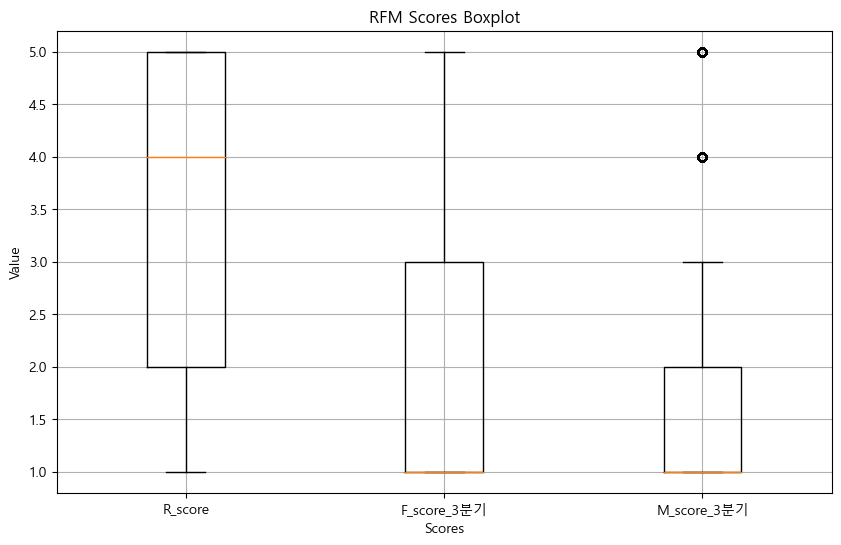

In [278]:
import matplotlib.pyplot as plt
import pandas as pd

# 컬럼을 변수로 변환하여 새로운 데이터프레임 생성
melted_df = pd.melt(quarterly_rfm_3분기, value_vars=['R_score', 'F_score_3분기', 'M_score_3분기'], var_name='Scores')

# Boxplot 그리기
plt.figure(figsize=(10, 6))
plt.title('RFM Scores Boxplot')
plt.xlabel('Scores')
plt.ylabel('Value')
plt.grid(True)

# 박스플롯 그리기
plt.boxplot([melted_df[melted_df['Scores'] == 'R_score']['value'],
             melted_df[melted_df['Scores'] == 'F_score_3분기']['value'],
             melted_df[melted_df['Scores'] == 'M_score_3분기']['value']],
            labels=['R_score', 'F_score_3분기', 'M_score_3분기'])

plt.show()

In [156]:
quarterly_rfm_4분기

,회원번호,R_score,F_score_4분기,M_score_4분기
0,18613824,2,1,1
1,18764160,3,1,1
2,18942336,5,1,1
3,18949760,4,1,1
4,19391488,2,1,1
...,...,...,...,...
11512,1644772352,5,1,2
11513,1644957952,5,1,1
11514,1670400000,5,5,5
11515,1670606016,5,1,1


#### 1분기 RFM Score

In [157]:
# 가중치 설정
weight_r = 0.5
weight_f = 0.3
weight_m = 0.2

# 가중 평균을 통한 RFM 점수 계산
quarterly_rfm_1분기['RFM_score'] = (quarterly_rfm_1분기['R_score'] * weight_r) + (quarterly_rfm_1분기['F_score_1분기'] * weight_f) + (quarterly_rfm_1분기['M_score_1분기'] * weight_m)

# RFM 점수 형식 변경
quarterly_rfm_1분기['RFM_score'] = quarterly_rfm_1분기['RFM_score'].apply(lambda x: int(x))

quarterly_rfm_1분기

,회원번호,R_score,F_score_1분기,M_score_1분기,RFM_score
0,18613824,2,1,1,1
1,18764160,3,2,1,2
2,18942336,5,3,4,4
3,18949760,4,1,1,2
4,19391488,2,1,1,1
...,...,...,...,...,...
11512,1644772352,5,1,1,3
11513,1644957952,5,1,1,3
11514,1670400000,5,5,5,5
11515,1670606016,5,1,1,3


#### 2분기 RFM Score

In [158]:
# 가중치 설정
weight_r = 0.5
weight_f = 0.3
weight_m = 0.2

# 가중 평균을 통한 RFM 점수 계산
quarterly_rfm_2분기['RFM_score'] = (quarterly_rfm_2분기['R_score'] * weight_r) + (quarterly_rfm_2분기['F_score_2분기'] * weight_f) + (quarterly_rfm_2분기['M_score_2분기'] * weight_m)

# RFM 점수 형식 변경
quarterly_rfm_2분기['RFM_score'] = quarterly_rfm_2분기['RFM_score'].apply(lambda x: int(x))

quarterly_rfm_2분기

,회원번호,R_score,F_score_2분기,M_score_2분기,RFM_score
0,18613824,2,1,1,1
1,18764160,3,2,1,2
2,18942336,5,2,2,3
3,18949760,4,1,1,2
4,19391488,2,1,1,1
...,...,...,...,...,...
11512,1644772352,5,1,1,3
11513,1644957952,5,1,1,3
11514,1670400000,5,5,5,5
11515,1670606016,5,1,1,3


#### 3분기 RFM Score

In [159]:
# 가중치 설정
weight_r = 0.5
weight_f = 0.3
weight_m = 0.2

# 가중 평균을 통한 RFM 점수 계산
quarterly_rfm_3분기['RFM_score'] = (quarterly_rfm_3분기['R_score'] * weight_r) + (quarterly_rfm_3분기['F_score_3분기'] * weight_f) + (quarterly_rfm_3분기['M_score_3분기'] * weight_m)

# RFM 점수 형식 변경
quarterly_rfm_3분기['RFM_score'] = quarterly_rfm_3분기['RFM_score'].apply(lambda x: int(x))

quarterly_rfm_3분기

,회원번호,R_score,F_score_3분기,M_score_3분기,RFM_score
0,18613824,2,1,1,1
1,18764160,3,2,1,2
2,18942336,5,3,5,4
3,18949760,4,1,1,2
4,19391488,2,1,1,1
...,...,...,...,...,...
11512,1644772352,5,1,1,3
11513,1644957952,5,1,1,3
11514,1670400000,5,5,5,5
11515,1670606016,5,3,2,3


#### 4분기 RFM Score

In [160]:
# 가중치 설정
weight_r = 0.5
weight_f = 0.3
weight_m = 0.2

# 가중 평균을 통한 RFM 점수 계산
quarterly_rfm_4분기['RFM_score'] = (quarterly_rfm_4분기['R_score'] * weight_r) + (quarterly_rfm_4분기['F_score_4분기'] * weight_f) + (quarterly_rfm_4분기['M_score_4분기'] * weight_m)

# RFM 점수 형식 변경
quarterly_rfm_4분기['RFM_score'] = quarterly_rfm_4분기['RFM_score'].apply(lambda x: int(x))

quarterly_rfm_4분기

,회원번호,R_score,F_score_4분기,M_score_4분기,RFM_score
0,18613824,2,1,1,1
1,18764160,3,1,1,2
2,18942336,5,1,1,3
3,18949760,4,1,1,2
4,19391488,2,1,1,1
...,...,...,...,...,...
11512,1644772352,5,1,2,3
11513,1644957952,5,1,1,3
11514,1670400000,5,5,5,5
11515,1670606016,5,1,1,3


#### 1분기 고객 등급

In [161]:
# membership 등급 할당 함수
def assign_membership(score):
    if score == 5:
        return 'VIP'
    elif score >= 4:
        return 'Gold'
    elif score >= 3:
        return 'Silver'
    else:
        return 'Bronze'

# membership 열 추가
quarterly_rfm_1분기['membership'] = quarterly_rfm_1분기['RFM_score'].apply(assign_membership)

quarterly_rfm_1분기

,회원번호,R_score,F_score_1분기,M_score_1분기,RFM_score,membership
0,18613824,2,1,1,1,Bronze
1,18764160,3,2,1,2,Bronze
2,18942336,5,3,4,4,Gold
3,18949760,4,1,1,2,Bronze
4,19391488,2,1,1,1,Bronze
...,...,...,...,...,...,...
11512,1644772352,5,1,1,3,Silver
11513,1644957952,5,1,1,3,Silver
11514,1670400000,5,5,5,5,VIP
11515,1670606016,5,1,1,3,Silver


In [162]:
# 등급별 회원 수 계산
membership_counts_1분기 = quarterly_rfm_1분기['membership'].value_counts()

membership_counts_1분기

membership
Bronze    5580
Silver    3541
Gold      1656
VIP        740
Name: count, dtype: int64

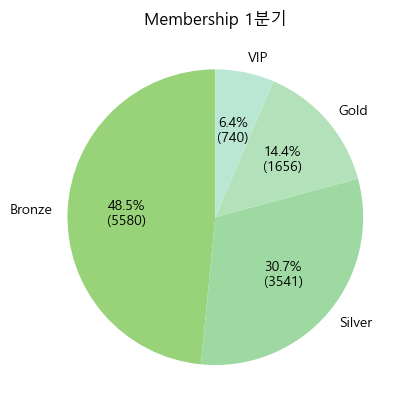

In [163]:
# 멤버십 데이터
membership_counts_1분기 = {'Bronze': 5580, 'Silver': 3541, 'Gold': 1656, 'VIP': 740}

# 색상 설정 (친환경 유기농 느낌)
colors = ['#98D37A', '#9ED9A2', '#B3E1BA', '#B9E7D3']

# Pie 차트 그리기
plt.pie(membership_counts_1분기.values(), labels=membership_counts_1분기.keys(), autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(membership_counts_1분기.values()) / 100),
        startangle=90, colors=colors)
plt.title('Membership 1분기')
plt.show()

In [164]:
final_member = pd.merge(member, quarterly_rfm_1분기[['회원번호', 'membership']], on='회원번호', how='left')
final_member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,VIP
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [165]:
len(final_member[~final_member['membership'].isin(['Bronze', 'Silver', 'Gold', 'VIP'])])

35

In [166]:
final_member[~final_member['membership'].isin(['Bronze', 'Silver', 'Gold', 'VIP'])]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
696,1075429504,정상회원,기타-기타,여,39.0,미신청,.,normal,NaN
1164,1147481280,정상회원,수지구-동천동,여,67.0,미신청,.,normal,NaN
1369,1178760448,정상회원,수지구-풍덕천동,여,38.0,미신청,.,normal,NaN
1477,1193949952,정상회원,수지구-풍덕천동,여,38.0,미신청,.,normal,NaN
1600,1209790912,정상회원,수지구-풍덕천동,여,37.0,미신청,.,normal,NaN
2932,1405597056,정상회원,기타-기타,여,41.0,미신청,.,normal,NaN
2998,1434481984,정상회원,기타-기타,여,36.0,미신청,.,normal,NaN
3010,143802880,정상회원,기타-기타,여,52.0,미신청,수신,normal,NaN
3164,1458554304,정상회원,기타-기타,여,50.0,미신청,.,normal,NaN
3581,1516619264,정상회원,기타-기타,여,40.0,미신청,.,normal,NaN


In [167]:
final_member_1 = final_member[final_member['회원번호'].isin([1075429504, 1147481280, 1178760448, 1193949952, 1209790912, 1405597056, 1434481984, 143802880, 1458554304, 1516619264, 1582544384, 1624113216, 1631871296, 1636303424, 1639837248, 18792000, 207916544, 20993216, 320122880, 39376896, 407863424, 472758464, 554437312, 57302144, 603424576, 700949952, 743224064, 744042560, 747155072, 752999616, 79561152, 833702208, 948046656, 95114432, 999474560]) == False]

In [168]:
final_member_1

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,VIP
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [169]:
final_member_1.to_csv('final_member_1.csv', index=False)

#### 2분기 고객 등급

In [170]:
# membership 등급 할당 함수
def assign_membership(score):
    if score == 5:
        return 'VIP'
    elif score >= 4:
        return 'Gold'
    elif score >= 3:
        return 'Silver'
    else:
        return 'Bronze'

# membership 열 추가
quarterly_rfm_2분기['membership'] = quarterly_rfm_2분기['RFM_score'].apply(assign_membership)

quarterly_rfm_2분기

,회원번호,R_score,F_score_2분기,M_score_2분기,RFM_score,membership
0,18613824,2,1,1,1,Bronze
1,18764160,3,2,1,2,Bronze
2,18942336,5,2,2,3,Silver
3,18949760,4,1,1,2,Bronze
4,19391488,2,1,1,1,Bronze
...,...,...,...,...,...,...
11512,1644772352,5,1,1,3,Silver
11513,1644957952,5,1,1,3,Silver
11514,1670400000,5,5,5,5,VIP
11515,1670606016,5,1,1,3,Silver


In [171]:
# 등급별 회원 수 계산
membership_counts_2분기 = quarterly_rfm_2분기['membership'].value_counts()

membership_counts_2분기

membership
Bronze    5598
Silver    3536
Gold      1642
VIP        741
Name: count, dtype: int64

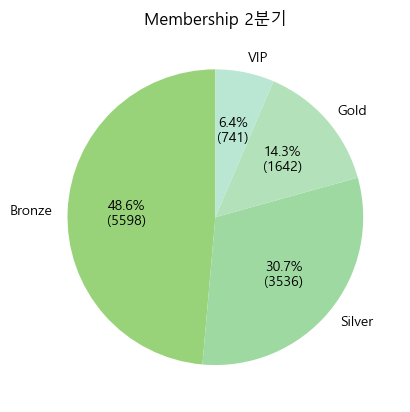

In [172]:
# membership_counts_2분기 데이터
membership_counts_2분기 = {'Bronze': 5598, 'Silver': 3536, 'Gold': 1642, 'VIP': 741}

# 색상 설정 (친환경 유기농 느낌)
colors = ['#98D37A', '#9ED9A2', '#B3E1BA', '#B9E7D3']

# Pie 차트 그리기
plt.pie(membership_counts_2분기.values(), labels=membership_counts_2분기.keys(), autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(membership_counts_2분기.values()) / 100),
        startangle=90, colors=colors)
plt.title('Membership 2분기')
plt.show()


In [173]:
final_member2 = pd.merge(member, quarterly_rfm_2분기[['회원번호', 'membership']], on='회원번호', how='left')
final_member2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Silver
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [174]:
final_member2[~final_member2['membership'].isin(['Bronze', 'Silver', 'Gold', 'VIP'])]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
696,1075429504,정상회원,기타-기타,여,39.0,미신청,.,normal,NaN
1164,1147481280,정상회원,수지구-동천동,여,67.0,미신청,.,normal,NaN
1369,1178760448,정상회원,수지구-풍덕천동,여,38.0,미신청,.,normal,NaN
1477,1193949952,정상회원,수지구-풍덕천동,여,38.0,미신청,.,normal,NaN
1600,1209790912,정상회원,수지구-풍덕천동,여,37.0,미신청,.,normal,NaN
2932,1405597056,정상회원,기타-기타,여,41.0,미신청,.,normal,NaN
2998,1434481984,정상회원,기타-기타,여,36.0,미신청,.,normal,NaN
3010,143802880,정상회원,기타-기타,여,52.0,미신청,수신,normal,NaN
3164,1458554304,정상회원,기타-기타,여,50.0,미신청,.,normal,NaN
3581,1516619264,정상회원,기타-기타,여,40.0,미신청,.,normal,NaN


In [175]:
final_member_2 = final_member2[final_member2['회원번호'].isin([1075429504, 1147481280, 1178760448, 1193949952, 1209790912, 1405597056, 1434481984, 143802880, 1458554304, 1516619264, 1582544384, 1624113216, 1631871296, 1636303424, 1639837248, 18792000, 207916544, 20993216, 320122880, 39376896, 407863424, 472758464, 554437312, 57302144, 603424576, 700949952, 743224064, 744042560, 747155072, 752999616, 79561152, 833702208, 948046656, 95114432, 999474560]) == False]

In [176]:
final_member_2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Silver
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [177]:
final_member_2.to_csv('final_member_2.csv', index=False)

#### 3분기 고객 등급

In [178]:
# membership 등급 할당 함수 
def assign_membership(score):
    if score == 5:
        return 'VIP'
    elif score >= 4:
        return 'Gold'
    elif score >= 3:
        return 'Silver'
    else:
        return 'Bronze'

# membership 열 추가
quarterly_rfm_3분기['membership'] = quarterly_rfm_3분기['RFM_score'].apply(assign_membership)

quarterly_rfm_3분기

,회원번호,R_score,F_score_3분기,M_score_3분기,RFM_score,membership
0,18613824,2,1,1,1,Bronze
1,18764160,3,2,1,2,Bronze
2,18942336,5,3,5,4,Gold
3,18949760,4,1,1,2,Bronze
4,19391488,2,1,1,1,Bronze
...,...,...,...,...,...,...
11512,1644772352,5,1,1,3,Silver
11513,1644957952,5,1,1,3,Silver
11514,1670400000,5,5,5,5,VIP
11515,1670606016,5,3,2,3,Silver


In [179]:
quarterly_rfm_3분기.to_csv('rfm_3분기.csv', index=False)

In [180]:
# 등급별 회원 수 계산
membership_counts_3분기 = quarterly_rfm_3분기['membership'].value_counts()

membership_counts_3분기

membership
Bronze    5486
Silver    3480
Gold      1765
VIP        786
Name: count, dtype: int64

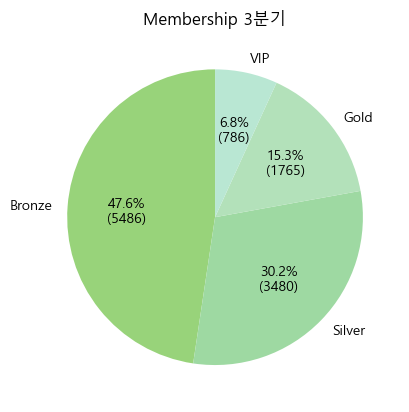

In [181]:
# membership_counts_3분기 데이터
membership_counts_3분기 = {'Bronze': 5486, 'Silver': 3480, 'Gold': 1765, 'VIP': 786}

# 색상 설정 (친환경 유기농 느낌)
colors = ['#98D37A', '#9ED9A2', '#B3E1BA', '#B9E7D3']

# Pie 차트 그리기
plt.pie(membership_counts_3분기.values(), labels=membership_counts_3분기.keys(), autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(membership_counts_3분기.values()) / 100),
        startangle=90, colors=colors)
plt.title('Membership 3분기')
plt.show()


In [182]:
final_member3 = pd.merge(member, quarterly_rfm_3분기[['회원번호', 'membership']], on='회원번호', how='left')
final_member3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [183]:
final_member3[~final_member3['membership'].isin(['Bronze', 'Silver', 'Gold', 'VIP'])]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
696,1075429504,정상회원,기타-기타,여,39.0,미신청,.,normal,NaN
1164,1147481280,정상회원,수지구-동천동,여,67.0,미신청,.,normal,NaN
1369,1178760448,정상회원,수지구-풍덕천동,여,38.0,미신청,.,normal,NaN
1477,1193949952,정상회원,수지구-풍덕천동,여,38.0,미신청,.,normal,NaN
1600,1209790912,정상회원,수지구-풍덕천동,여,37.0,미신청,.,normal,NaN
2932,1405597056,정상회원,기타-기타,여,41.0,미신청,.,normal,NaN
2998,1434481984,정상회원,기타-기타,여,36.0,미신청,.,normal,NaN
3010,143802880,정상회원,기타-기타,여,52.0,미신청,수신,normal,NaN
3164,1458554304,정상회원,기타-기타,여,50.0,미신청,.,normal,NaN
3581,1516619264,정상회원,기타-기타,여,40.0,미신청,.,normal,NaN


In [184]:
final_member_3 = final_member3[final_member3['회원번호'].isin([1075429504, 1147481280, 1178760448, 1193949952, 1209790912, 1405597056, 1434481984, 143802880, 1458554304, 1516619264, 1582544384, 1624113216, 1631871296, 1636303424, 1639837248, 18792000, 207916544, 20993216, 320122880, 39376896, 407863424, 472758464, 554437312, 57302144, 603424576, 700949952, 743224064, 744042560, 747155072, 752999616, 79561152, 833702208, 948046656, 95114432, 999474560]) == False]

In [185]:
final_member_3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [186]:
final_member_3.to_csv('final_member_3.csv', index=False)

#### 4분기 고객 등급

In [187]:
# membership 등급 할당 함수
def assign_membership(score):
    if score == 5:
        return 'VIP'
    elif score >= 4:
        return 'Gold'
    elif score >= 3:
        return 'Silver'
    else:
        return 'Bronze'

# membership 열 추가
quarterly_rfm_4분기['membership'] = quarterly_rfm_4분기['RFM_score'].apply(assign_membership)

quarterly_rfm_4분기

,회원번호,R_score,F_score_4분기,M_score_4분기,RFM_score,membership
0,18613824,2,1,1,1,Bronze
1,18764160,3,1,1,2,Bronze
2,18942336,5,1,1,3,Silver
3,18949760,4,1,1,2,Bronze
4,19391488,2,1,1,1,Bronze
...,...,...,...,...,...,...
11512,1644772352,5,1,2,3,Silver
11513,1644957952,5,1,1,3,Silver
11514,1670400000,5,5,5,5,VIP
11515,1670606016,5,1,1,3,Silver


In [188]:
# 등급별 회원 수 계산
membership_counts_4분기 = quarterly_rfm_4분기['membership'].value_counts()

membership_counts_4분기

membership
Bronze    6198
Silver    4661
Gold       609
VIP         49
Name: count, dtype: int64

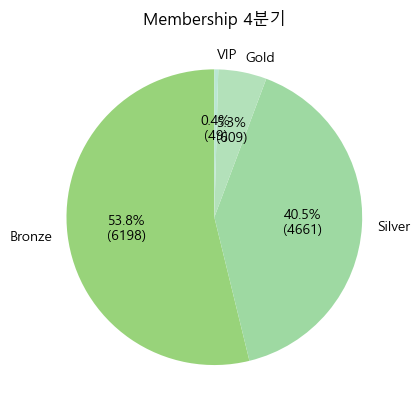

In [189]:
# membership_counts_4분기 데이터
membership_counts_4분기 = {'Bronze': 6198, 'Silver': 4661, 'Gold': 609, 'VIP': 49}

# 색상 설정 (친환경 유기농 느낌)
colors = ['#98D37A', '#9ED9A2', '#B3E1BA', '#B9E7D3']

# Pie 차트 그리기
plt.pie(membership_counts_4분기.values(), labels=membership_counts_4분기.keys(), autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(membership_counts_4분기.values()) / 100),
        startangle=90, colors=colors)
plt.title('Membership 4분기')
plt.show()

In [190]:
final_member4 = pd.merge(member, quarterly_rfm_4분기[['회원번호', 'membership']], on='회원번호', how='left')
final_member4

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Gold
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Silver
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Silver


In [191]:
final_member_4 = final_member4[final_member4['회원번호'].isin([1075429504, 1147481280, 1178760448, 1193949952, 1209790912, 1405597056, 1434481984, 143802880, 1458554304, 1516619264, 1582544384, 1624113216, 1631871296, 1636303424, 1639837248, 18792000, 207916544, 20993216, 320122880, 39376896, 407863424, 472758464, 554437312, 57302144, 603424576, 700949952, 743224064, 744042560, 747155072, 752999616, 79561152, 833702208, 948046656, 95114432, 999474560]) == False]

In [192]:
final_member_4

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Gold
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Silver
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Silver


In [193]:
final_member_4.to_csv('final_member_4.csv', index=False)

In [194]:
# # 회원번호와 공급일자로 그룹화하여 매출 합을 계산
# grouped_data_month = grouped_data.groupby(['회원번호', 'YearMonth'])['구매금액'].sum().reset_index()

# # 회원번호별 월 매출 합을 계산
# grouped_data_month_sum = grouped_data_month.groupby('회원번호')['구매금액'].sum().reset_index()

# grouped_data_month_sum

In [195]:
final_member_3 #3분기

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


#### 3분기 데이터로 VIP 평가

#### 기존 등급

In [196]:
# Gold_member 열에서 normal과 VIP의 개수
gold_member_counts = final_member_3['Gold_member'].value_counts()

# normal과 VIP의 비율 계산
normal_ratio = gold_member_counts['normal'] / len(final_member_3)
vip_ratio = gold_member_counts['VIP'] / len(final_member_3)

print("normal 비율:", normal_ratio)
print("VIP 비율:", vip_ratio)

normal 비율: 0.9822002257532344
VIP 비율: 0.01779977424676565


In [197]:
final_member_3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold
...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold


In [198]:
m_scores_quarterly

YearMonth,2021Q1,2021Q2,2021Q3,2021Q4
회원번호,,,,
18613824,0,0,21059,0
18764160,29865,35035,21633,0
18942336,222070,50923,277781,10146
18949760,0,0,2776,0
19391488,0,3159,0,0
...,...,...,...,...
1644772352,0,0,0,85000
1644957952,0,0,0,25079
1670400000,4072690,4570532,3825491,1027037


In [199]:
merged_df3= final_member_3.merge(m_scores_quarterly[['2021Q3']], left_on='회원번호', right_index=True)
merged_df3

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218
...,...,...,...,...,...,...,...,...,...,...
11547,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0
11548,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162
11549,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0
11550,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117


In [200]:
# merged_df3.to_csv('merged_df3_고객매출.csv', index=False)

#### 기존 등급에서 VIP 수

In [201]:
vip_members = final_member_3[final_member_3['Gold_member'] == 'VIP']
vip_members

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
235,1019647424,정상회원,수지구-동천동,여,54.0,미신청,수신,VIP,VIP
381,1035466112,정상회원,수지구-풍덕천동,여,47.0,미신청,수신,VIP,VIP
424,1039972480,정상회원,수지구-상현동,여,42.0,미신청,수신,VIP,VIP
483,104683968,정상회원,수지구-풍덕천동,여,72.0,미신청,.,VIP,VIP
525,1051939968,정상회원,수지구-상현동,여,46.0,미신청,수신,VIP,VIP
...,...,...,...,...,...,...,...,...,...
11441,980225984,정상회원,기타-기타,여,43.0,미신청,수신,VIP,VIP
11487,993938112,정상회원,수지구-신봉동,여,47.0,미신청,수신,VIP,VIP
11489,994348288,정상회원,수지구-풍덕천동,여,32.0,미신청,수신,VIP,VIP
11509,99763712,정상회원,수지구-신봉동,여,48.0,미신청,수신,VIP,VIP


#### 새 등급

In [202]:
# membership 열에서 Bronze, Silver, Gold, VIP의 개수
membership_counts = final_member_3['membership'].value_counts()

# Bronze, Silver, Gold, VIP의 비율 계산
bronze_ratio = membership_counts['Bronze'] / len(final_member_3)
silver_ratio = membership_counts['Silver'] / len(final_member_3)
gold_ratio = membership_counts['Gold'] / len(final_member_3)
vip_ratio = membership_counts['VIP'] / len(final_member_3)

print("Bronze 비율:", bronze_ratio)
print("Silver 비율:", silver_ratio)
print("Gold 비율:", gold_ratio)
print("VIP 비율:", vip_ratio)

Bronze 비율: 0.4763393244768603
Silver 비율: 0.3021620213597291
Gold 비율: 0.15325171485629938
VIP 비율: 0.06824693930711123


#### 새 등급에서 VIP 수

In [203]:
vip_members = final_member_3[final_member_3['membership'] == 'VIP']
vip_members

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
6,1000491648,정상회원,수지구-동천동,여,37.0,미신청,.,normal,VIP
30,100224000,정상회원,수지구-상현동,여,63.0,미신청,.,normal,VIP
40,1005059264,정상회원,수지구-풍덕천동,여,39.0,미신청,.,normal,VIP
81,1007817280,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,VIP
82,1007820992,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,VIP
...,...,...,...,...,...,...,...,...,...
11487,993938112,정상회원,수지구-신봉동,여,47.0,미신청,수신,VIP,VIP
11489,994348288,정상회원,수지구-풍덕천동,여,32.0,미신청,수신,VIP,VIP
11509,99763712,정상회원,수지구-신봉동,여,48.0,미신청,수신,VIP,VIP
11533,999227712,정상회원,수지구-상현동,여,40.0,미신청,수신,VIP,VIP


#### 기존 등급도 VIP고 새 등급도 VIP인 회원

#### 기존 26명이 새로운 등급에서 VIP에 해당이 안됨

In [204]:
final_member_3[(final_member_3['Gold_member'] == 'VIP') & (final_member_3['membership'] == 'VIP')]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
235,1019647424,정상회원,수지구-동천동,여,54.0,미신청,수신,VIP,VIP
381,1035466112,정상회원,수지구-풍덕천동,여,47.0,미신청,수신,VIP,VIP
424,1039972480,정상회원,수지구-상현동,여,42.0,미신청,수신,VIP,VIP
483,104683968,정상회원,수지구-풍덕천동,여,72.0,미신청,.,VIP,VIP
525,1051939968,정상회원,수지구-상현동,여,46.0,미신청,수신,VIP,VIP
...,...,...,...,...,...,...,...,...,...
11441,980225984,정상회원,기타-기타,여,43.0,미신청,수신,VIP,VIP
11487,993938112,정상회원,수지구-신봉동,여,47.0,미신청,수신,VIP,VIP
11489,994348288,정상회원,수지구-풍덕천동,여,32.0,미신청,수신,VIP,VIP
11509,99763712,정상회원,수지구-신봉동,여,48.0,미신청,수신,VIP,VIP


#### VIP들은 조합원상태 확인

In [205]:
final_member_3[(final_member_3['Gold_member'] == 'VIP') & (final_member_3['membership'] == 'VIP') & (final_member_3['조합원상태'] == '정상회원')]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
235,1019647424,정상회원,수지구-동천동,여,54.0,미신청,수신,VIP,VIP
381,1035466112,정상회원,수지구-풍덕천동,여,47.0,미신청,수신,VIP,VIP
424,1039972480,정상회원,수지구-상현동,여,42.0,미신청,수신,VIP,VIP
483,104683968,정상회원,수지구-풍덕천동,여,72.0,미신청,.,VIP,VIP
525,1051939968,정상회원,수지구-상현동,여,46.0,미신청,수신,VIP,VIP
...,...,...,...,...,...,...,...,...,...
11441,980225984,정상회원,기타-기타,여,43.0,미신청,수신,VIP,VIP
11487,993938112,정상회원,수지구-신봉동,여,47.0,미신청,수신,VIP,VIP
11489,994348288,정상회원,수지구-풍덕천동,여,32.0,미신청,수신,VIP,VIP
11509,99763712,정상회원,수지구-신봉동,여,48.0,미신청,수신,VIP,VIP


In [206]:
final_member_3.조합원상태.unique()

array(['정상회원', '탈퇴', '탈퇴처리중', '탈퇴신청'], dtype=object)

#### VIP인데 탈퇴인 회원이 한명 확인됨

In [207]:
final_member_3[(final_member_3['조합원상태'] == '탈퇴') & (final_member_3['membership'] == 'VIP')]
#아래 고객을 확인해보니, 최근까지 온 기록이 있어서 애초부터 조합원에 가입을 하지 않았다고 추측

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
4501,1670400000,탈퇴,기타-비조합원,남,36.0,미신청,수신,normal,VIP


##### 기존에는 VIP가 아닌데, 새 등급에서 VIP로 평가된 사람 - 607명

In [208]:
final_member_3[(final_member_3['membership'] == 'VIP') & (final_member_3['Gold_member'] != 'VIP')]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
6,1000491648,정상회원,수지구-동천동,여,37.0,미신청,.,normal,VIP
30,100224000,정상회원,수지구-상현동,여,63.0,미신청,.,normal,VIP
40,1005059264,정상회원,수지구-풍덕천동,여,39.0,미신청,.,normal,VIP
81,1007817280,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,VIP
82,1007820992,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,VIP
...,...,...,...,...,...,...,...,...,...
11432,978839552,정상회원,수지구-상현동,여,46.0,미신청,수신,normal,VIP
11456,982122816,정상회원,수지구-풍덕천동,여,36.0,미신청,수신,normal,VIP
11470,985161088,정상회원,수지구-기타,여,46.0,미신청,.,normal,VIP
11483,992792960,정상회원,수지구-신봉동,여,42.0,미신청,.,normal,VIP


#### 기존에 VIP이지만 우리가 VIP가 아니라고 평가한사람 - 26명

In [209]:
len(final_member_3[(final_member_3['membership'] != 'VIP') & (final_member_3['Gold_member'] == 'VIP')])

26

#### 그 회원들을 파악해보니 새 계급으로는 Gold 등급으로 판정

In [210]:
final_member_3[(final_member_3['membership'] != 'VIP') & (final_member_3['Gold_member'] == 'VIP')]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
587,1059544000,정상회원,수지구-동천동,여,50.0,미신청,수신,VIP,Gold
1173,1148787904,정상회원,수지구-풍덕천동,여,45.0,미신청,수신,VIP,Gold
1243,1163118080,정상회원,수지구-풍덕천동,여,59.0,미신청,.,VIP,Gold
1265,116573504,정상회원,수지구-풍덕천동,여,51.0,미신청,수신,VIP,Gold
1372,1179844352,정상회원,수지구-동천동,여,43.0,미신청,수신,VIP,Gold
1639,1213669952,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,VIP,Gold
1834,1241708544,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,VIP,Gold
2527,1340139648,정상회원,수지구-풍덕천동,여,38.0,미신청,수신,VIP,Gold
2574,1348267072,정상회원,수지구-풍덕천동,여,36.0,미신청,수신,VIP,Gold
3173,1459541696,정상회원,수지구-풍덕천동,여,59.0,미신청,.,VIP,Gold


In [211]:
gold_merged_data = final_member_3[(final_member_3['membership'] != 'VIP') & (final_member_3['Gold_member'] == 'VIP')].merge(quarterly_rfm_3분기, on=['회원번호', 'membership'], how='left')
gold_merged_data.drop('주소', axis=1, inplace=True)
gold_merged_data.head()

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,R_score,F_score_3분기,M_score_3분기,RFM_score
0,1059544000,정상회원,여,50.0,미신청,수신,VIP,Gold,5,5,3,4
1,1148787904,정상회원,여,45.0,미신청,수신,VIP,Gold,5,5,4,4
2,1163118080,정상회원,여,59.0,미신청,.,VIP,Gold,5,5,4,4
3,116573504,정상회원,여,51.0,미신청,수신,VIP,Gold,5,4,4,4
4,1179844352,정상회원,여,43.0,미신청,수신,VIP,Gold,5,5,4,4


In [212]:
gold_merged_data[['R_score', 'F_score_3분기', 'M_score_3분기']].mean() #RFM 점수 각각의 평균

R_score        4.923077
F_score_3분기    4.961538
M_score_3분기    3.846154
dtype: float64

#### 위 결과를 통해 기존 VIP 고객이 Gold로 떨어진 이유는 M(VIP 금액 기준)을 충족시키지 못했기 때문

In [213]:
m_scores_q3 = m_scores_quarterly[['2021Q3']]
m_scores_q3

YearMonth,2021Q3
회원번호,
18613824,21059
18764160,21633
18942336,277781
18949760,2776
19391488,0
...,...
1644772352,0
1644957952,0
1670400000,3825491


#### VIP고객들이 주로 사는 물품 확인

In [214]:
final_member_3[final_member_3['membership'] == 'VIP']

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership
6,1000491648,정상회원,수지구-동천동,여,37.0,미신청,.,normal,VIP
30,100224000,정상회원,수지구-상현동,여,63.0,미신청,.,normal,VIP
40,1005059264,정상회원,수지구-풍덕천동,여,39.0,미신청,.,normal,VIP
81,1007817280,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,VIP
82,1007820992,정상회원,수지구-풍덕천동,여,48.0,미신청,수신,normal,VIP
...,...,...,...,...,...,...,...,...,...
11487,993938112,정상회원,수지구-신봉동,여,47.0,미신청,수신,VIP,VIP
11489,994348288,정상회원,수지구-풍덕천동,여,32.0,미신청,수신,VIP,VIP
11509,99763712,정상회원,수지구-신봉동,여,48.0,미신청,수신,VIP,VIP
11533,999227712,정상회원,수지구-상현동,여,40.0,미신청,수신,VIP,VIP


In [215]:
회원번호_리스트 = final_member_3.loc[final_member_3['membership'] == 'VIP', '회원번호'].tolist()
회원번호_리스트 #VIP 고객 리스트

[1000491648,
 100224000,
 1005059264,
 1007817280,
 1007820992,
 1008955008,
 1010970624,
 1011000320,
 1019151872,
 1019647424,
 1024500864,
 1028092224,
 1029179840,
 1032552192,
 1035466112,
 1039972480,
 1040081984,
 1040210048,
 1042767616,
 1042869696,
 104683968,
 1048164864,
 1051099200,
 1051939968,
 1055588864,
 1056167936,
 1056303424,
 1057619328,
 106174336,
 1066292416,
 1068488064,
 1069922752,
 1069976576,
 107642432,
 108143552,
 1085806400,
 1086478272,
 1087244800,
 1088904064,
 1090457536,
 1092747840,
 1094804288,
 1095977280,
 1099336640,
 1099349632,
 110010688,
 1105450304,
 1106127744,
 1109459264,
 1110819712,
 1112913280,
 111391552,
 1120996160,
 1124082688,
 1126443520,
 112698176,
 1128279104,
 1128472128,
 1134465152,
 1135909120,
 1136605120,
 114298048,
 114303616,
 1143461184,
 1145666112,
 1145758912,
 1149018048,
 115008896,
 1159842240,
 116261696,
 1164571328,
 1164962944,
 1165467776,
 1166969280,
 1168760320,
 117226816,
 1177372160,
 1177580032,

In [216]:
vip_grouped_list = grouped_data[grouped_data['회원번호'].isin(회원번호_리스트)].groupby(['회원번호', '공급일자_']).apply(lambda x: x[['회원번호', '공급일자_', '물품명', '구매금액']])

In [217]:
vip_grouped_list

회원번호      공급일자_                물품명   구매금액
회원번호       공급일자_                                                             
19627200   2021-01-08 100687    19627200 2021-01-08         호박쌀엿(100g)   4020
                      100688    19627200 2021-01-08       약과(200g/18개)   8806
                      100689    19627200 2021-01-08         사과/(5kg)/대  46903
           2021-01-12 100690    19627200 2021-01-12         양송이스프(80g)   4595
                      100691    19627200 2021-01-12  단호박찐빵(300g/5개)/매장   7658
...                                  ...        ...                ...    ...
1670400000 2021-10-27 94593   1670400000 2021-10-27        채소볶음밥(300g)   4786
                      95196   1670400000 2021-10-27            깻잎(30장)   1723
                      95197   1670400000 2021-10-27     슬라이스햄(200g)-매장   6509
           2021-10-29 95198   1670400000 2021-10-29   몽블랑페스츄리(210g/매장)   7275
           2021-10-30 95409   1670400000 2021-10-30       다슬기해장국(350g)  11486

[108516 rows x 4 columns]

#### 회원고객이 선호하는 대분류 비율

In [218]:
grouped_data['count'] = 1
p1 = grouped_data.pivot_table(index='회원번호',columns='물품대분류',values='count',aggfunc='sum',fill_value=0,margins=True).reset_index()
# p1['간식_비율']= p1['간식'] / p1['All']
# p1['건강_비율']= p1['건강'] / p1['All']
p1.tail() #회원고객이 선호하는 대분류 비율

물품대분류,회원번호,간식,건강,과실,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,All
11513,1644957952,2,0,0,1,0,0,0,0,0,0,0,0,1,0,4
11514,1670400000,291,21,37,146,52,14,88,97,124,22,10,1,200,162,1265
11515,1670606016,1,0,1,0,0,1,1,0,1,1,1,0,5,0,12
11516,1670620864,5,1,2,2,1,0,2,1,3,0,0,0,4,1,22
11517,All,45499,2814,8515,35813,10603,3828,19942,13515,13590,3755,4451,482,74538,46782,284127


In [219]:
# vip_grouped_list[vip_grouped_list['회원번호'] == 1000491648]

In [220]:
p1_final_member = p1.merge(final_member_3[['회원번호', 'Gold_member', 'membership']], on='회원번호')

In [221]:
p1_final_member_vip = p1_final_member[p1_final_member['membership'] == 'VIP']

In [222]:
# 각 열의 전체 합 계산
column_sums = p1_final_member_vip[['간식', '건강', '과실', '반찬', '생활용품', '서류', '수산', '양념/가루', '음료', '잡곡', '주곡', '주류', '채소', '축산물']].sum()

# 전체 합 행 생성
total_row = pd.DataFrame({'회원번호': 'All', '간식': column_sums['간식'], '건강': column_sums['건강'], '과실': column_sums['과실'],
                          '반찬': column_sums['반찬'], '생활용품': column_sums['생활용품'], '서류': column_sums['서류'],
                          '수산': column_sums['수산'], '양념/가루': column_sums['양념/가루'], '음료': column_sums['음료'],
                          '잡곡': column_sums['잡곡'], '주곡': column_sums['주곡'], '주류': column_sums['주류'],
                          '채소': column_sums['채소'], '축산물': column_sums['축산물'], 'All': '', 'Gold_member': '',
                          'membership': ''}, index=[0])

# 전체 합 행 추가
p1_final_member_with_total = pd.concat([p1_final_member_vip, total_row], ignore_index=True)
p1_final_member_with_total.tail()

,회원번호,간식,건강,과실,반찬,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물,All,Gold_member,membership
782,1612813888,7,0,1,6,0,1,0,5,2,1,2,0,13,5,43,normal,VIP
783,1618521088,6,0,0,3,1,0,3,3,5,0,0,1,3,7,32,normal,VIP
784,1620061568,2,0,2,0,2,1,3,0,3,0,0,1,8,10,32,normal,VIP
785,1670400000,291,21,37,146,52,14,88,97,124,22,10,1,200,162,1265,normal,VIP
786,All,17123,963,4207,11459,4082,1601,7067,4745,4505,1331,1675,217,31298,18243,,,


#### 대분류별 top 10
- 채소: 31,298
- 축산물: 18,243
- 간식: 17,123
- 수산: 7,067
- 과실: 4,207
- 양념/가루: 4,745
- 반찬: 11,459
- 음료: 4,505
- 생활용품: 4,082
- 잡곡: 1,331

In [223]:
grouped_data['count'] = 1
p2 = grouped_data.pivot_table(index='회원번호',columns='물품중분류',values='count',aggfunc='sum',fill_value=0,margins=True).reset_index()
# p1['간식_비율']= p1['간식'] / p1['All']
# p1['건강_비율']= p1['건강'] / p1['All']
p2 #회원고객이 선호하는 중분류 비율

물품중분류,회원번호,가루,감자,건강일반,건어물,견과,고구마,과실주,과일,과일채소,...,절임/장아찌,즉석조리,차,찹쌀,콩/화본/깨,콩나물,해조,홍삼/녹용,화장품,All
0,18613824,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,18764160,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
2,18942336,0,0,1,1,1,1,0,4,0,...,0,0,0,1,0,0,0,0,2,32
3,18949760,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,19391488,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11513,1644957952,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
11514,1670400000,37,9,19,11,11,5,0,26,17,...,9,6,26,3,15,27,29,2,11,1265
11515,1670606016,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,12
11516,1670620864,1,0,1,0,0,0,0,2,0,...,0,0,1,0,0,1,1,0,0,22


In [224]:
p2_final_member = p2.merge(final_member_3[['회원번호', 'Gold_member', 'membership']], on='회원번호')

In [225]:
p2_final_member_vip = p2_final_member[p2_final_member['membership'] == 'VIP']

In [226]:
# 각 열의 전체 합 계산
column_sums = p2_final_member_vip[['가루', '감자', '건강일반', '건어물', '견과', '고구마', '과실주', '과일', '과일채소',
       '과자', '기름/식초', '김치', '꿀', '냉동수산', '닭/오리', '도서', '돼지', '두부/유부', '떡',
       '말린나물/건재', '멥쌀', '밀가공', '밑반찬', '버섯', '보리/혼합곡', '빵', '뿌리채소', '생물수산',
       '생활용품', '섬유', '세제/세안', '소', '소금', '소스/기타양념', '손질한채소', '수산가공', '식기/편백',
       '식사대용', '쌈채소류', '알', '양념채소', '어묵/묵', '열매채소', '유색미/발아미', '유제품', '육가공',
       '음료', '잎/줄기채소', '장', '잼/병조림/기타', '전통주', '절임/장아찌', '즉석조리', '차', '찹쌀',
       '콩/화본/깨', '콩나물', '해조', '홍삼/녹용', '화장품']].sum()

# 전체 합 행 생성
total_row = pd.DataFrame({'회원번호': 'All', '가루': column_sums['가루'], '감자': column_sums['감자'], '건강일반': column_sums['건강일반'],
                          '건어물': column_sums['건어물'], '견과': column_sums['견과'], '고구마': column_sums['고구마'],
                          '과실주': column_sums['과실주'], '과일': column_sums['과일'], '과일채소': column_sums['과일채소'],
                          '과자': column_sums['과자'], '기름/식초': column_sums['기름/식초'], '김치': column_sums['김치'],
                          '꿀': column_sums['꿀'], '냉동수산': column_sums['냉동수산'], '닭/오리': column_sums['닭/오리'],
                          '도서': column_sums['도서'], '돼지': column_sums['돼지'], '두부/유부': column_sums['두부/유부'],
                          '떡': column_sums['떡'], '말린나물/건재': column_sums['말린나물/건재'], '멥쌀': column_sums['멥쌀'],
                          '밀가공': column_sums['밀가공'], '밑반찬': column_sums['밑반찬'], '버섯': column_sums['버섯'],
                          '보리/혼합곡': column_sums['보리/혼합곡'], '빵': column_sums['빵'], '뿌리채소': column_sums['뿌리채소'],
                          '생물수산': column_sums['생물수산'], '생활용품': column_sums['생활용품'], '섬유': column_sums['섬유'],
                          '세제/세안': column_sums['세제/세안'], '소': column_sums['소'], '소금': column_sums['소금'],
                          '소스/기타양념': column_sums['소스/기타양념'], '손질한채소': column_sums['손질한채소'],
                          '수산가공': column_sums['수산가공'], '식기/편백': column_sums['식기/편백'], '식사대용': column_sums['식사대용'],
                          '쌈채소류': column_sums['쌈채소류'], '알': column_sums['알'], '양념채소': column_sums['양념채소'],
                          '어묵/묵': column_sums['어묵/묵'], '열매채소': column_sums['열매채소'], '유색미/발아미': column_sums['유색미/발아미'],
                          '유제품': column_sums['유제품'], '육가공': column_sums['육가공'], '음료': column_sums['음료'],
                          '잎/줄기채소': column_sums['잎/줄기채소'], '장': column_sums['장'], '잼/병조림/기타': column_sums['잼/병조림/기타'],
                          '전통주': column_sums['전통주'], '절임/장아찌': column_sums['절임/장아찌'], '즉석조리': column_sums['즉석조리'],
                          '차': column_sums['차'], '찹쌀': column_sums['찹쌀'], '콩/화본/깨': column_sums['콩/화본/깨'],
                          '콩나물': column_sums['콩나물'], '해조': column_sums['해조'], '홍삼/녹용': column_sums['홍삼/녹용'],
                          '화장품': column_sums['화장품'], 'All': '', 'Gold_member': '', 'membership': ''}, index=[0])

# 전체 행/열 보기
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# 전체 합 행 추가
p2_final_member_with_total = pd.concat([p2_final_member_vip, total_row], ignore_index=True)
p2_final_member_with_total.tail()

,회원번호,가루,감자,건강일반,건어물,견과,고구마,과실주,과일,과일채소,...,차,찹쌀,콩/화본/깨,콩나물,해조,홍삼/녹용,화장품,All,Gold_member,membership
782,1612813888,2,0,0,0,0,1,0,1,1,...,0,0,1,1,0,0,0,43,normal,VIP
783,1618521088,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,32,normal,VIP
784,1620061568,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,32,normal,VIP
785,1670400000,37,9,19,11,11,5,0,26,17,...,26,3,15,27,29,2,11,1265,normal,VIP
786,All,1621,947,808,1501,493,654,41,3714,3036,...,529,321,889,2291,1486,155,1100,,,


#### 중분류별 top 10
- 잎/줄기채소 (8021 개)
- 양념채소 (5760 개)
- 알 (5334 개)
- 두부/유부 (5807 개)
- 과자 (4715 개)
- 유제품 (4665 개)
- 과일 (3714 개)
- 빵 (3970 개)
- 음료 (3976 개)
- 가루 (1621 개)

In [227]:
final_member_3_vip = final_member_3[final_member_3['membership'] == 'VIP']

In [228]:
filtered_data = grouped_data[grouped_data['회원번호'] == 99995712]
cosmetics_data = filtered_data[filtered_data['물품중분류'] == '잎/줄기채소']
cosmetics_data

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,공급일자_,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,YearMonth,count
289103,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-02-14,채소,잎/줄기채소,비타민채소,비타민채소(200g),1.0,3159,매장B,NaN,13:49,2021-02,1
289132,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-06-10,채소,잎/줄기채소,열무,열무(500g),2.0,6318,매장B,NaN,12:48,2021-06,1
289133,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-06-10,채소,잎/줄기채소,머위,머위대(400g),1.0,3829,매장B,NaN,12:48,2021-06,1
289161,99995712,정상회원,수지구-상현동,여,66.0,미신청,.,normal,2021-09-16,채소,잎/줄기채소,얼갈이,얼갈이(500g),2.0,6509,매장B,NaN,10:09,2021-09,1
